# Q.1

## Airlines Passengers data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:\\Users\Admin\Downloads\\Airlines+Data (1).xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<Axes: >

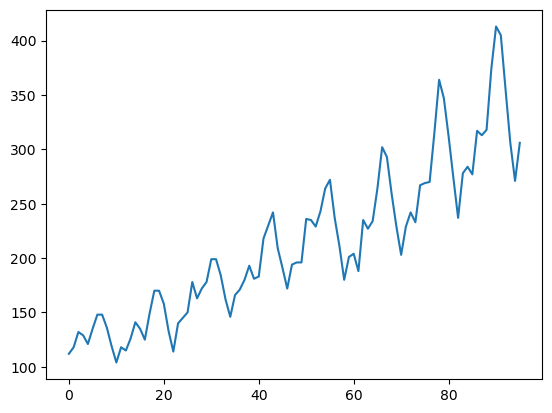

In [4]:
data.Passengers.plot()

<Axes: ylabel='Density'>

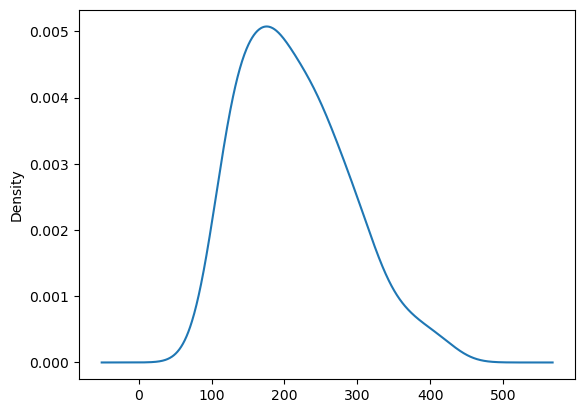

In [5]:
data.Passengers.plot(kind='kde')

<Axes: ylabel='Frequency'>

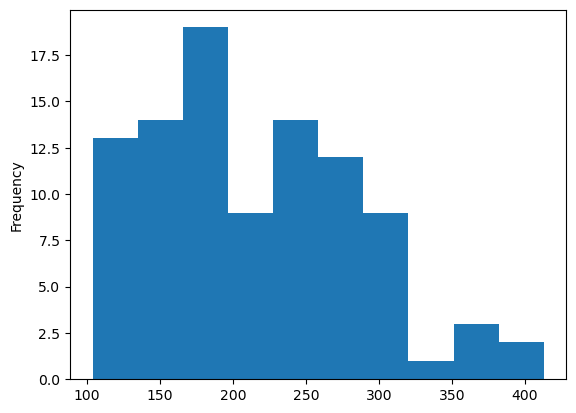

In [6]:
data.Passengers.plot(kind='hist')

In [7]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction

<Axes: xlabel='month', ylabel='year'>

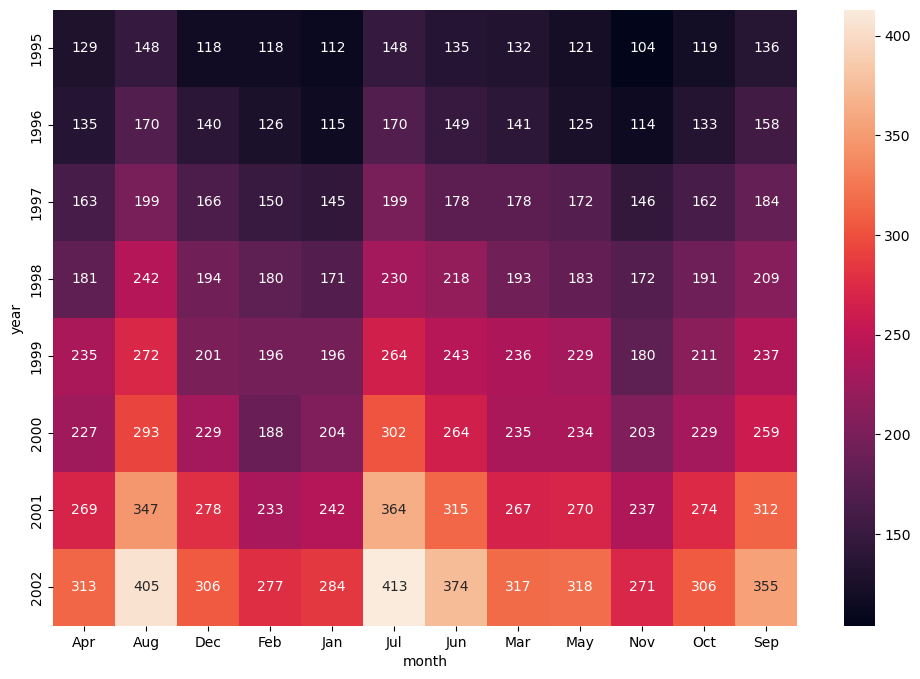

In [8]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<Axes: xlabel='year', ylabel='Passengers'>

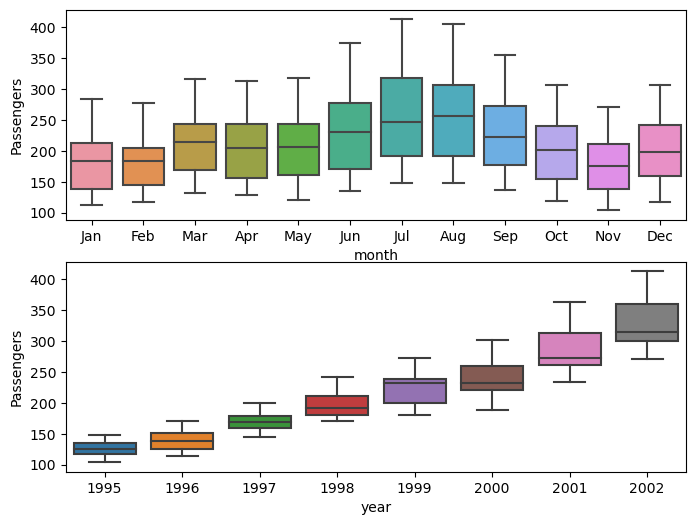

In [9]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

<Axes: xlabel='year', ylabel='Passengers'>

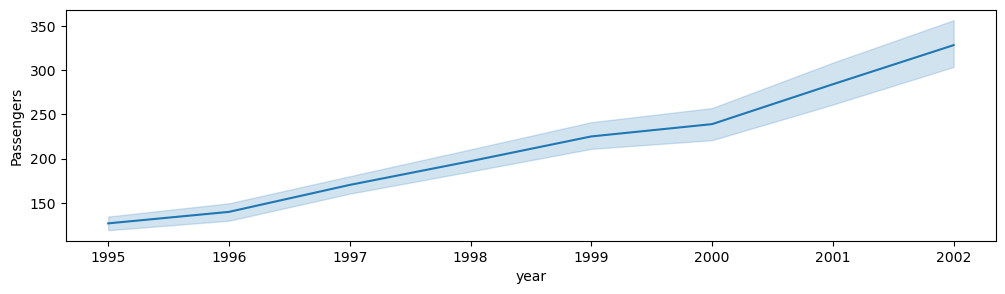

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

## Decomposition

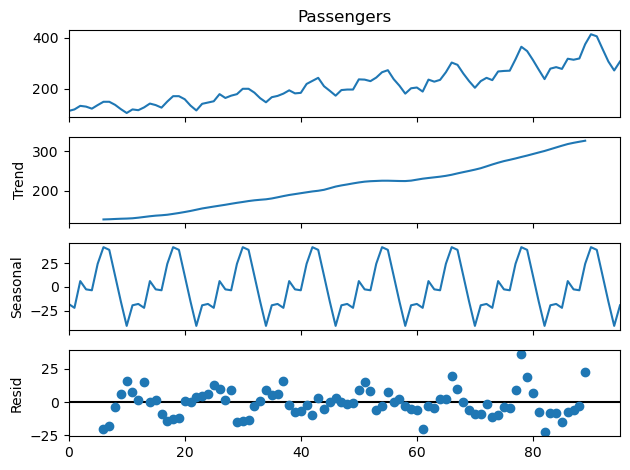

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

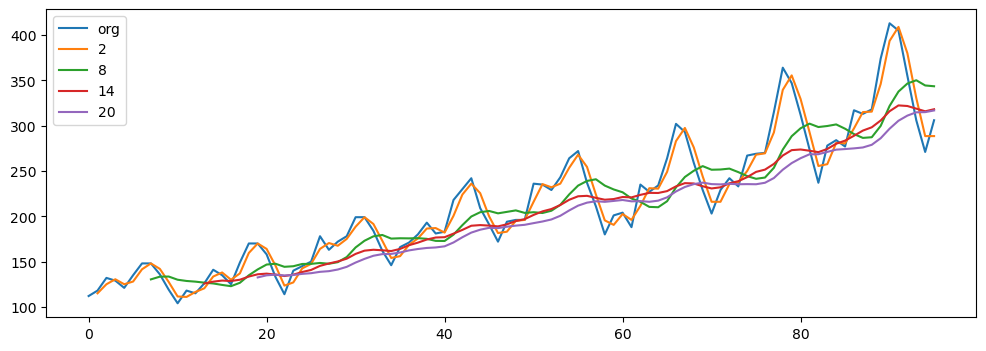

In [12]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## ACF and PACF

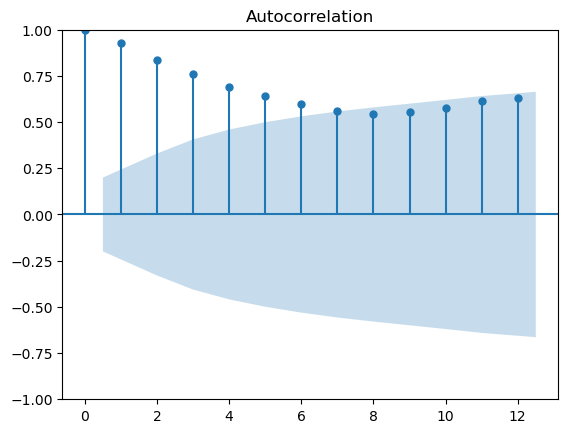

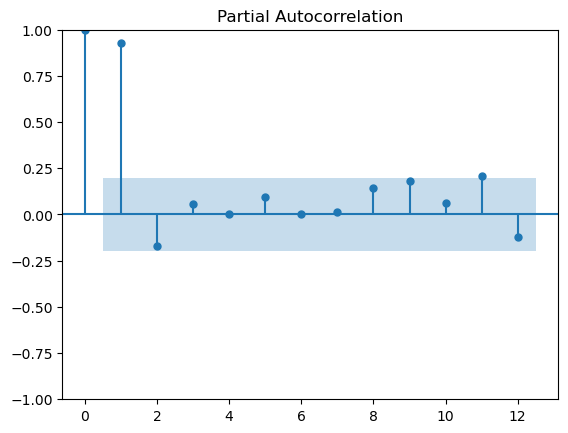

In [13]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

In [14]:
data['t'] = range(1, len(data) + 1)

In [15]:
data['log_Passengers'] = np.log2(data['Passengers'])

In [16]:
data['t_square'] = (data['t'])*(data['t'])

In [17]:
data = pd.get_dummies(data, columns=['month'])

In [18]:
data

,Month,Passengers,Date,year,t,log_Passengers,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,6.807355,1,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,1995-02-01,1995,2,6.882643,4,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,1995-03-01,1995,3,7.044394,9,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,1995-04-01,1995,4,7.011227,16,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,1995-05-01,1995,5,6.918863,25,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8.661778,8464,False,True,False,False,False,False,False,False,False,False,False,False
92,2002-09-01,355,2002-09-01,2002,93,8.471675,8649,False,False,False,False,False,False,False,False,False,False,False,True
93,2002-10-01,306,2002-10-01,2002,94,8.257388,8836,False,False,False,False,False,False,False,False,False,False,True,False
94,2002-11-01,271,2002-11-01,2002,95,8.082149,9025,False,False,False,False,False,False,False,False,False,True,False,False


## Splitting data into training and validation part

In [19]:
Train = data.head(78)
Test = data.tail(18)

In [20]:
Test

,Month,Passengers,Date,year,t,log_Passengers,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
78,2001-07-01,364,2001-07-01,2001,79,8.507795,6241,False,False,False,False,False,True,False,False,False,False,False,False
79,2001-08-01,347,2001-08-01,2001,80,8.438792,6400,False,True,False,False,False,False,False,False,False,False,False,False
80,2001-09-01,312,2001-09-01,2001,81,8.285402,6561,False,False,False,False,False,False,False,False,False,False,False,True
81,2001-10-01,274,2001-10-01,2001,82,8.098032,6724,False,False,False,False,False,False,False,False,False,False,True,False
82,2001-11-01,237,2001-11-01,2001,83,7.888743,6889,False,False,False,False,False,False,False,False,False,True,False,False
83,2001-12-01,278,2001-12-01,2001,84,8.118941,7056,False,False,True,False,False,False,False,False,False,False,False,False
84,2002-01-01,284,2002-01-01,2002,85,8.149747,7225,False,False,False,False,True,False,False,False,False,False,False,False
85,2002-02-01,277,2002-02-01,2002,86,8.113742,7396,False,False,False,True,False,False,False,False,False,False,False,False
86,2002-03-01,317,2002-03-01,2002,87,8.308339,7569,False,False,False,False,False,False,False,True,False,False,False,False
87,2002-04-01,313,2002-04-01,2002,88,8.290019,7744,True,False,False,False,False,False,False,False,False,False,False,False


## Performing the data driven methods

In [21]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.33895543334941

In [22]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

3681.478360087265

In [23]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=data).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

46.933802431969255

In [24]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=data).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

105.60621134668173

In [25]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

18.67531431113863

In [26]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data = data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1912.3512962088275

In [27]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data = data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

3823.525781106865

In [28]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,18.675314
2,rmse_Quad,46.933802
0,rmse_linear,48.338955
3,rmse_add_sea,105.606211
5,rmse_Mult_sea,1912.351296
1,rmse_Exp,3681.478360
6,rmse_Mult_add_sea,3823.525781


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Root Mean Squared Error (RMSE): 46.865929572383465


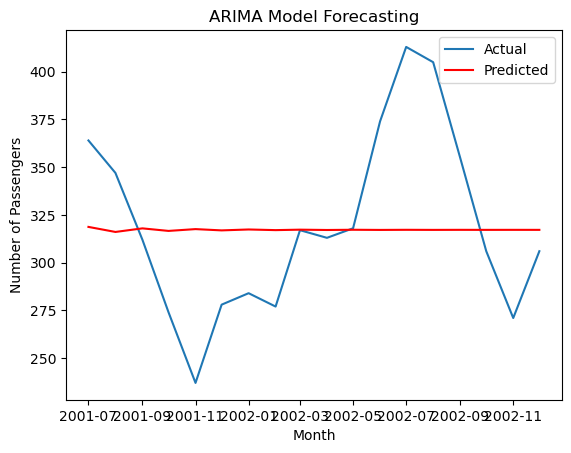

In [30]:
# Assuming you have already determined the values for p, d, and q
p = 1
d = 1
q = 1

# Define the ARIMA model
model = ARIMA(Train['Passengers'], order=(p, d, q))

# Fit the model
fitted_model = model.fit()

# Make predictions on the test set
predictions = fitted_model.predict(start=len(Train), end=len(Train) + len(Test) - 1, typ='levels')

# Evaluate the model performance
from sklearn.metrics import mean_squared_error
import numpy as np

test_data = Test['Passengers']
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.plot(Test['Month'], test_data, label='Actual')
plt.plot(Test['Month'], predictions, label='Predicted', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('ARIMA Model Forecasting')
plt.legend()
plt.show()

# Q.2

## Cocacola dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_excel("C:\\Users\Admin\Downloads\\CocaCola_Sales_Rawdata (1).xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [34]:
data.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


<Axes: >

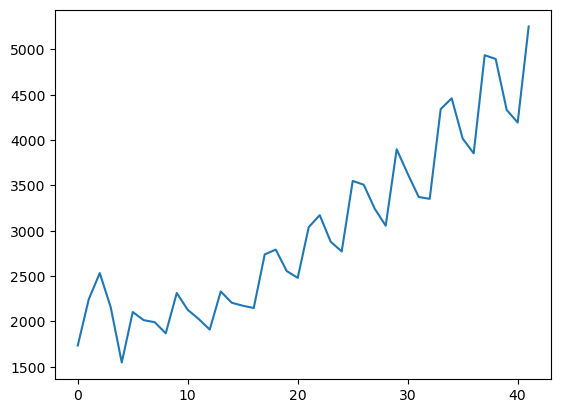

In [35]:
data.Sales.plot()

<Axes: ylabel='Frequency'>

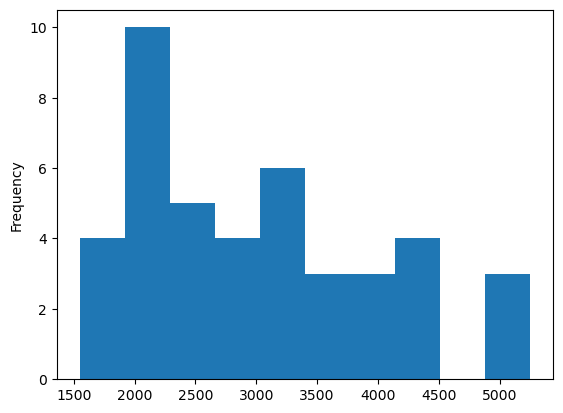

In [36]:
data.Sales.plot(kind='hist')

<Axes: ylabel='Density'>

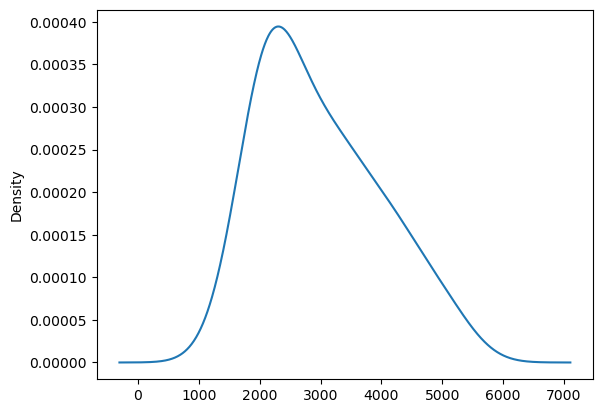

In [37]:
data.Sales.plot(kind='kde')

In [38]:
data['Quarters']=0
data['Year']=0
for i in range(42):
    p=data['Quarter'][i]
    data['Quarters'][i]=p[0:2]
    data['Year'][i]=p[3:5]    
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10756\3515300595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarters'][i]=p[0:2]
C:\Users\Admin\AppData\Local\Temp\ipykernel_10756\3515300595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'][i]=p[3:5]


,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


<Axes: xlabel='Quarters', ylabel='Year'>

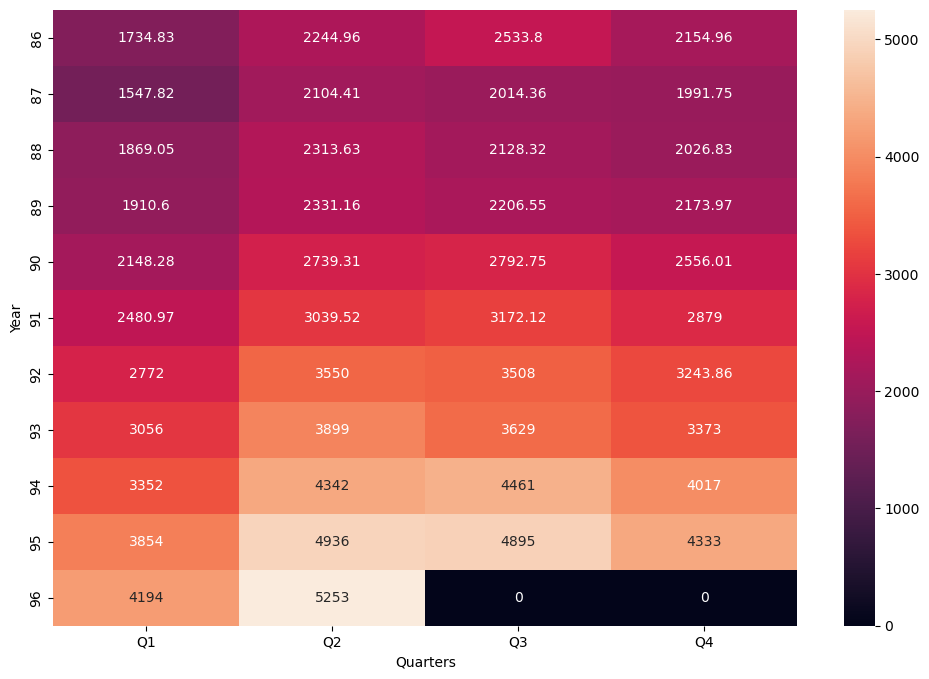

In [39]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<Axes: xlabel='Year', ylabel='Sales'>

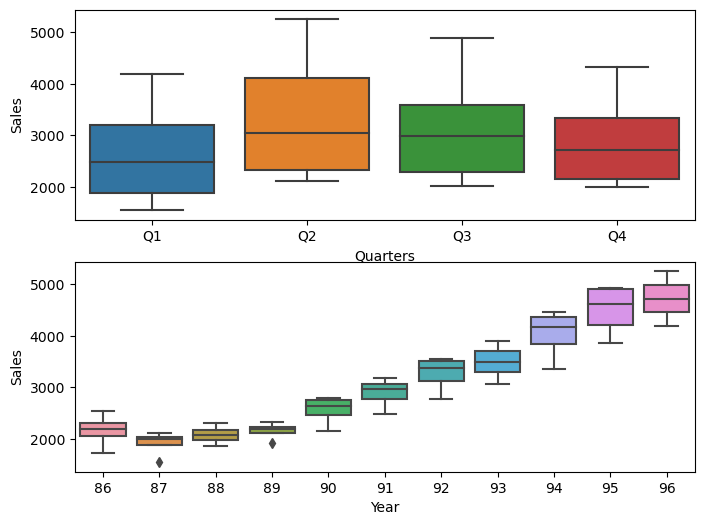

In [40]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=data)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=data)

<Axes: xlabel='Year', ylabel='Sales'>

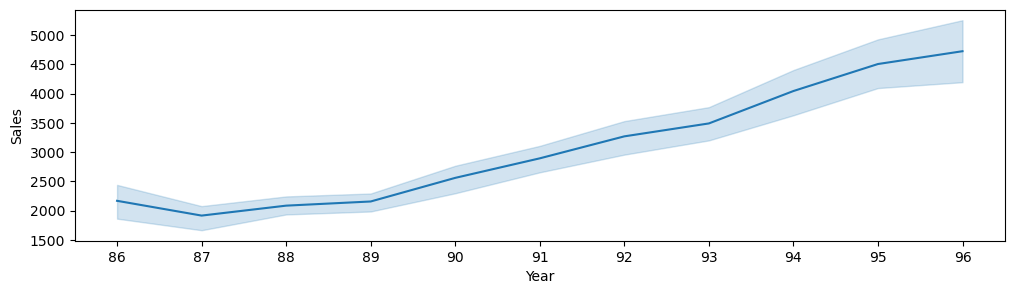

In [41]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=data)

## Decomposition

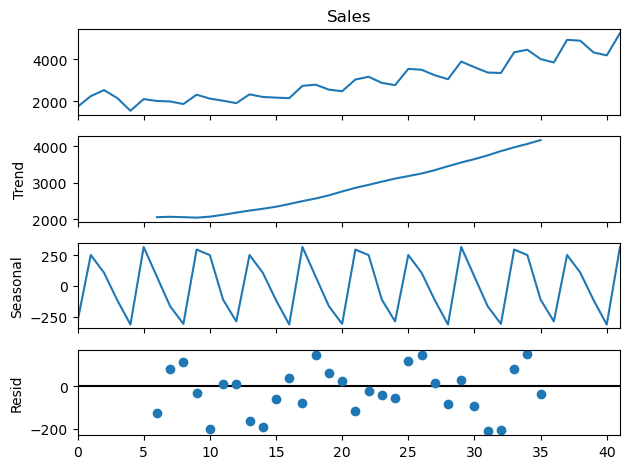

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

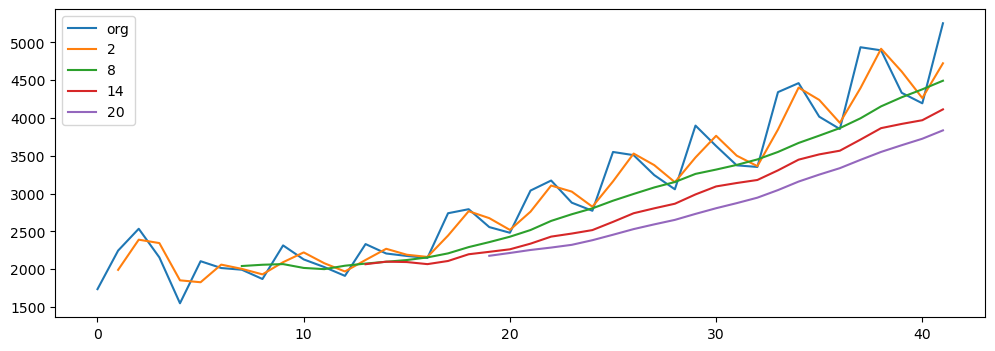

In [43]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,24,6):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## ACF and PACF

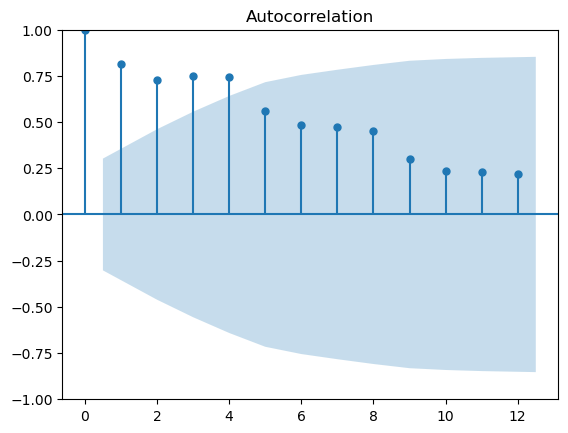

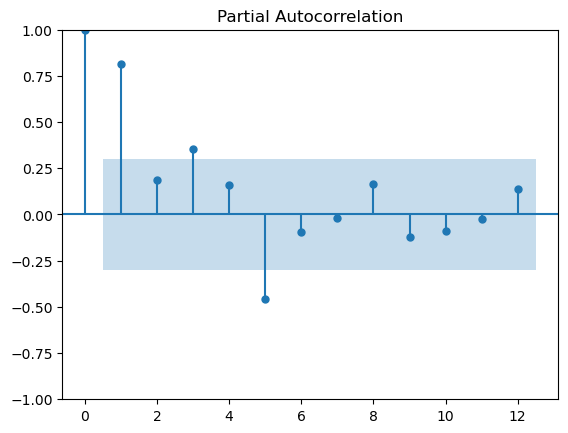

In [44]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [45]:
data['t'] = range(1, len(data) + 1)

In [46]:
data['log_Sales'] = np.log2(data['Sales'])

In [47]:
data['t_square'] = (data['t'])*(data['t'])

In [48]:
data = pd.get_dummies(data, columns=['Quarters'])

In [49]:
data

,Quarter,Sales,Year,t,log_Sales,t_square,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,86,1,10.760576,1,True,False,False,False
1,Q2_86,2244.960999,86,2,11.132475,4,False,True,False,False
2,Q3_86,2533.804993,86,3,11.307090,9,False,False,True,False
3,Q4_86,2154.962997,86,4,11.073447,16,False,False,False,True
4,Q1_87,1547.818996,87,5,10.596021,25,True,False,False,False
5,Q2_87,2104.411995,87,6,11.039201,36,False,True,False,False
6,Q3_87,2014.362999,87,7,10.976108,49,False,False,True,False
7,Q4_87,1991.746998,87,8,10.959819,64,False,False,False,True
8,Q1_88,1869.049999,88,9,10.868089,81,True,False,False,False
9,Q2_88,2313.631996,88,10,11.175944,100,False,True,False,False


## Splitting data into training and validation part

In [50]:
Train = data.head(78)
Test = data.tail(18)

In [51]:
Test

,Quarter,Sales,Year,t,log_Sales,t_square,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
24,Q1_92,2772.000000,92,25,11.436712,625,True,False,False,False
25,Q2_92,3550.000000,92,26,11.793603,676,False,True,False,False
26,Q3_92,3508.000000,92,27,11.776433,729,False,False,True,False
27,Q4_92,3243.859993,92,28,11.663496,784,False,False,False,True
28,Q1_93,3056.000000,93,29,11.577429,841,True,False,False,False
29,Q2_93,3899.000000,93,30,11.928888,900,False,True,False,False
30,Q3_93,3629.000000,93,31,11.825356,961,False,False,True,False
31,Q4_93,3373.000000,93,32,11.719817,1024,False,False,False,True
32,Q1_94,3352.000000,94,33,11.710806,1089,True,False,False,False
33,Q2_94,4342.000000,94,34,12.084144,1156,False,True,False,False


## Performing the data driven methods

In [52]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

414.2799074155778

In [53]:
#Exponential

Exp = smf.ols('log_Sales~t',data=data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

147495.19193000803

In [54]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=data).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

373.1788981664756

In [55]:
#Additive seasonality 

add_sea = smf.ols('Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=data).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1087.5685608617196

In [56]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square',data=data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

373.1788981664756

In [57]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data = data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

93991.73987563745

In [58]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data = data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

149662.78023282584

In [59]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,373.178898
4,rmse_add_sea_quad,373.178898
0,rmse_linear,414.279907
3,rmse_add_sea,1087.568561
5,rmse_Mult_sea,93991.739876
1,rmse_Exp,147495.191930
6,rmse_Mult_add_sea,149662.780233


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Root Mean Squared Error (RMSE): 1122.1518095510064


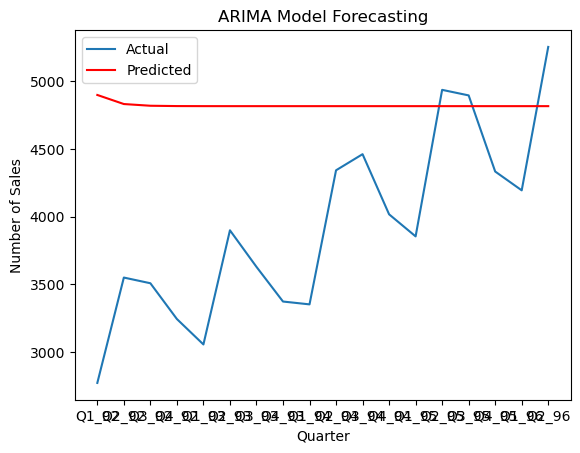

In [61]:
# Assuming you have already determined the values for p, d, and q
p = 1
d = 1
q = 1

# Define the ARIMA model
model = ARIMA(Train['Sales'], order=(p, d, q))

# Fit the model
fitted_model = model.fit()

# Make predictions on the test set
predictions = fitted_model.predict(start=len(Train), end=len(Train) + len(Test) - 1, typ='levels')

# Evaluate the model performance
from sklearn.metrics import mean_squared_error
import numpy as np

test_data = Test['Sales']
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.plot(Test['Quarter'], test_data, label='Actual')
plt.plot(Test['Quarter'], predictions, label='Predicted', color='red')
plt.xlabel('Quarter')
plt.ylabel('Number of Sales')
plt.title('ARIMA Model Forecasting')
plt.legend()
plt.show()